# 4장 신경망 학습

## 손실 함수

학습을 위해서는 현재 신경망 내의 가중치들이 얼마나 잘 동작하는지 평가가 필요하다. 그 평가를 위한 함수를 손실함수 (loss function)이라 한다.

### 평균제곱오차 (mean squared error)

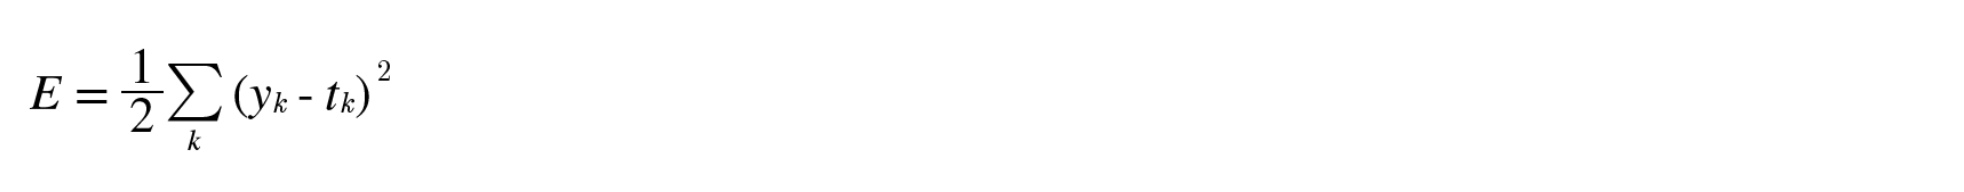

In [6]:
import numpy as np

# 차이를 제곱해서 그 총합을 구한다음, 2로 나눈다.
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t =                               [0,   0,     1,   0,    0]
print(mean_squared_error(np.array([0.1, 0.05, 0.9, 0.1, 0.1]), np.array(t)))
print(mean_squared_error(np.array([0.9, 0.05, 0.9, 0.1, 0.1]), np.array(t)))

0.02125
0.42125


### 교차 엔트로피 오차

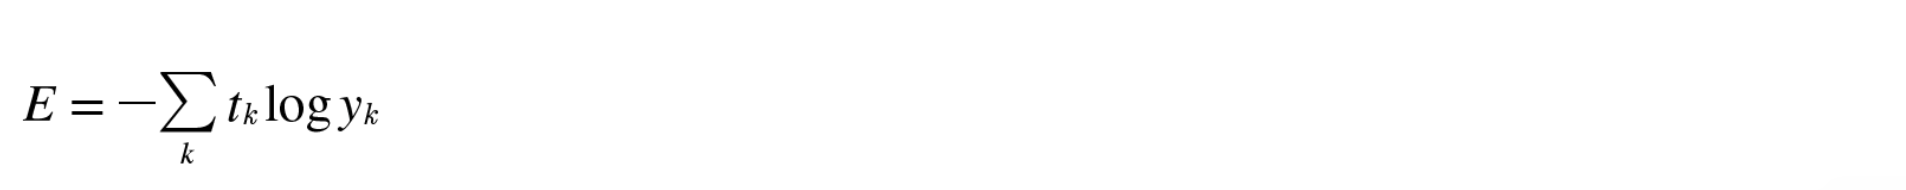

여기는 log 는 자연로그($\log_e$) . 실질적으로는 one-hot encoding 에서 정답인 $y_k$에 대해서만 계산이 된다. 정답인 항(즉 $t_k$가 1인 항의) $\log_e{y_k}$ 만 계산된다.

* 정답이 2일때 출력이 0.6이면 `-log0.6 = 0.51`, 출력이 0.1이면 `-log0.1 = 2.30`이 된다.


(one-hot encoding 응 `0,1,2` 등의 결과값을 `[1,0,0],[0,1,0],[0,0,1]` 처럼 답에 해당하는 자리에 1을 넣은 배열로 만드는 것을 말한다.)

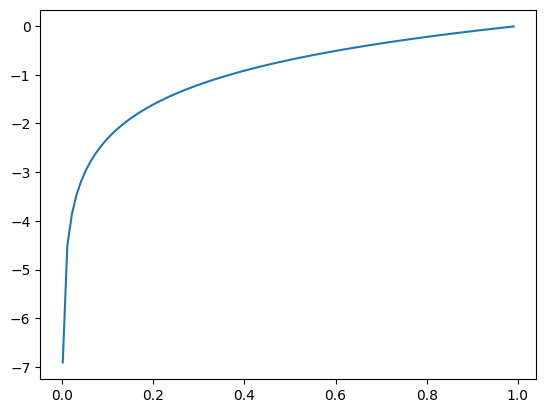

In [8]:
# 자연로그의 그래프. 오차가 작아지면 값도 급격하게 작아진다.
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.001, 1.0, 0.01)
y = np.log(x)
plt.plot(x,y)
plt.show()

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

t =                               [0,   0,     1,   0,    0]
print(cross_entropy_error(np.array([0.1, 0.05, 0.1, 0.1, 0.1]), np.array(t)))
print(cross_entropy_error(np.array([0.9, 0.05, 0.9, 0.1, 0.1]), np.array(t)))

2.302584092994546
0.1053604045467214


### 배치를 위한 손실 함수
cross entropy 를 배치용으로 만들면 이렇게 된다. (이제.. 시그마가 두개가 나오네..) 하지만, 잘 보면 다 더해서 나누니까 "평균 손실 함수" 가 되는 것 뿐(?)이다.

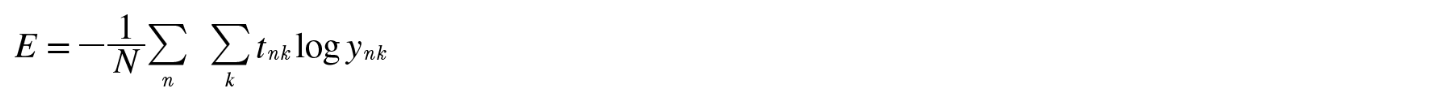


In [18]:
# 배치를 위해, 배열을 받을 수 있게 수정하면
def cross_entropy_error_onehot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size


print(cross_entropy_error_onehot(np.array([0.1, 0.05, 0.1, 0.1, 0.1]), np.array([0,0,1,0,0])))
print(cross_entropy_error_onehot(np.array([0.9, 0.05, 0.9, 0.1, 0.1]), np.array([0,0,1,0,0])))

# 배치를 위해, 배열을 받을 수 있게 수정하면
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
    # one-hot 인코딩에서는 `t * np.log(y)` 였는데,
    # 레이블 표현에서는 `np.log(y[np.arange(batch_size), t])` 로 바꿈.
    #
    # 약간 복잡한 코드인데, 만약 batch_size 가 5라면, 
    #   `np.arange(batch_size)` 는 `[0,1,2,3,4]` 를 돌려준다. 
    # t 에는 `[2,7,0,9,4]` 같은 레이블이 들어있다. 
    # 
    # `y[np.arange(batch_size), t])` 는 
    #   `[y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]` 
    # 즉 y 배열에서 정답이 들어있는 배열을 돌려준다.


print(cross_entropy_error(np.array([0.1, 0.05, 0.1, 0.1, 0.1]), np.array([2])))
print(cross_entropy_error(np.array([0.9, 0.05, 0.9, 0.1, 0.1]), np.array([2])))

2.3025850929940455
0.10536051565782628
2.3025850929940455
0.10536051565782628


### 손실함수

여기서 만든 손실함수와 미분을 이용해서 학습을 한다.

"정확도"가 아닌 "손실"을 이용하는 이유는, 정확도의 계산은 "35%" 또는 "37%"같은 값이 될 것이고, 가중치를 조금씩 변경하는 것으로는 정확도를 어느쪽으로 수정해야할지 알기 힘들기 때문이다. 지금 까지 만든 손실함수는 가중치에 변화를 주면 값이 변하는 시그모이드 형태이고, 가중치를 조금씩 바꾸면서 손실값이 줄어들도록 하면 학습이 된다.

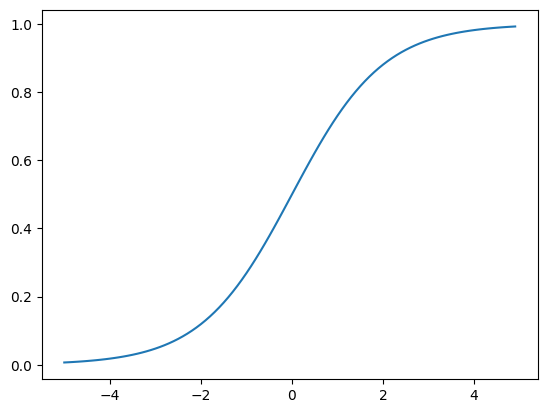

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, 1/(1+np.exp(-x))) # sigmoid
plt.show()